In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
for i in df.select_dtypes(include='number'):
  print(df[i].skew())

0.9827514413284587
0.6715925723840199
0.3183372952546368
4.54065542590319
5.680346571971724
1.250567293314441
1.515531257594554
0.07128766294927483
0.19368349811284427
2.4286723536602945
0.8608288068888538
0.21780157547366327


In [124]:
for i in df.select_dtypes(include='number'):
  if df[i].skew()>1 or df[i].skew()<-1:
    df[i]=np.log1p(df[i])

In [125]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,1.218131,0.083038,2.639013,3.634750,0.996747,3.311113,0.501073,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.269969,0.038991,0.623790,0.682575,0.001887,0.154386,0.093731,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,9.500000,5.000000
50%,7.900000,0.520000,0.260000,1.163151,0.076035,2.708050,3.663562,0.996750,3.310000,0.482426,10.200000,6.000000
75%,9.200000,0.640000,0.420000,1.280934,0.086178,3.091042,4.143135,0.997835,3.400000,0.548121,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,14.900000,8.000000


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as impipe

In [129]:
def quality_group(q):
    if q <= 5:
        return "Low"
    elif q == 6:
        return "Medium"
    else:
        return "High"

df["quality_class"] = df["quality"].apply(quality_group)


In [130]:
df['quality_class']=df['quality_class'].map({'Low':0,'Medium':1,'High':2})

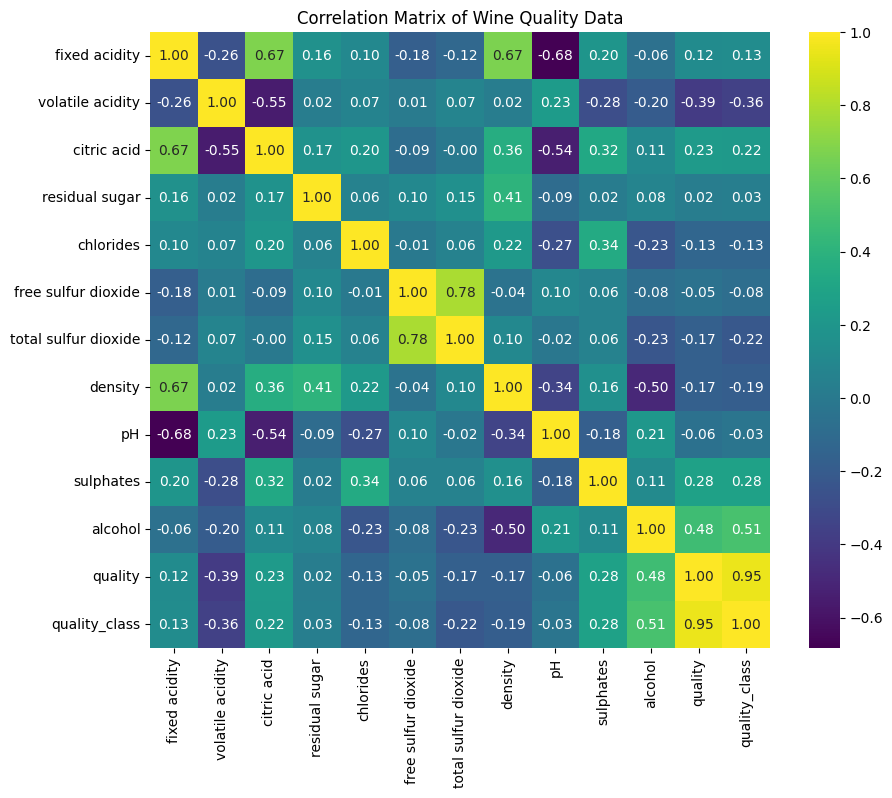

In [131]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Data')
plt.show()

In [132]:
x=df.drop(['quality','quality_class'],axis=1)
y=df['quality_class']

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [134]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_col=SimpleImputer(strategy='mean')
preprocess=ColumnTransformer([('num',num_col,x_train.select_dtypes(include=np.number).columns)])

In [135]:
from sklearn.tree import DecisionTreeRegressor

rfe=RFE(estimator=GradientBoostingClassifier())

In [136]:
model=impipe([('pre',preprocess),('sm',SMOTETomek()),('rf',rfe),('ex',GradientBoostingClassifier(learning_rate=0.2,max_depth=6))])

In [137]:
model.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('sm', SMOTETomek()),
                ('rf', RFE(estimator=GradientBoostingClassifier())),
                ('ex',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=6))])

In [138]:
y_pred=model.predict(x_test)

In [177]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       145
           1       0.57      0.60      0.58       122
           2       0.72      0.58      0.65        53

    accuracy                           0.67       320
   macro avg       0.68      0.65      0.66       320
weighted avg       0.67      0.67      0.67       320



In [195]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [196]:
!pkill gunicorn

In [197]:
from pyngrok import ngrok
ngrok.kill()
!ngrok config add-authtoken 31xqy4FlnolfMtGhZz13nfEP6hc_2WQRpqKsb7PAcc9f2xSPE
public_url=ngrok.connect(5000)
print("public url:",public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
public url: NgrokTunnel: "https://dd106b4e0017.ngrok-free.app" -> "http://localhost:5000"


In [198]:
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok
hg=joblib.load('model.pkl')
app=Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
  return "ML Model is Running in API!"

@app.route('/predict',methods=['POST'])
def predict():
  try:
    data=request.json['feat']
    feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                     'chlorides','free sulfur dioxide','total sulfur dioxide',
                     'density','pH','sulphates','alcohol']
    features = pd.DataFrame([data], columns=feature_names)
    prediction = model.predict(features)[0]
    return jsonify({'prediction': float(prediction)})
  except Exception as e:
    return jsonify({'error':str(e)})
if __name__=="__main__":
  app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://dd106b4e0017.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [02/Sep/2025 13:53:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Sep/2025 13:53:57] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Sep/2025 13:54:28] "POST /predict HTTP/1.1" 200 -
